In [4]:
from main import main

main()

TP 3: PERCEPTRON SIMPLE
EJERCIO 1
Función lógica AND
Entrenando con Perceptron Simple Escalon
En la corrida 0 del la fila 1 con error=1.0 garde los pesos
Guarde estos valores: [0.12762097 0.1867297  0.92490919]
En la corrida 49 del la fila 0 con error=0.0 garde los pesos
Guarde estos valores: [-0.17237903  0.4867297   0.62490919]
Pesos finales: [-0.17237903  0.4867297   0.62490919]
Generalizando con Perceptron Simple Escalon
Entrada: 
[[-1  1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]]
Resultado: [-1 -1 -1  1]

Función lógica XOR
Entrenando con Perceptron Simple Escalon
En la corrida 0 del la fila 2 con error=1.0 garde los pesos
Guarde estos valores: [0.34322306 0.96808862 0.88932983]
Pesos finales: [0.34322306 0.96808862 0.88932983]
Generalizando con Perceptron Simple Escalon
Entrada: 
[[-1  1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]]
Resultado: [ 1  1 -1  1]

EJERCIO 2
Entrenando con Perceptron Simple Lineal
En la corrida 0 del la fila 1 con error=1512.5330835
Guarde estos valores: [0.92723894 0.80140621 0.6702

En la corrida 0 del la fila 3 con error=2.0 garde los pesos
Guarde estos valores: [0.70862981 0.12974666 0.17785885]
En la corrida 23 del la fila 2 con error=1.0 garde los pesos
Guarde estos valores: [0.42862981 0.20974666 0.25785885]


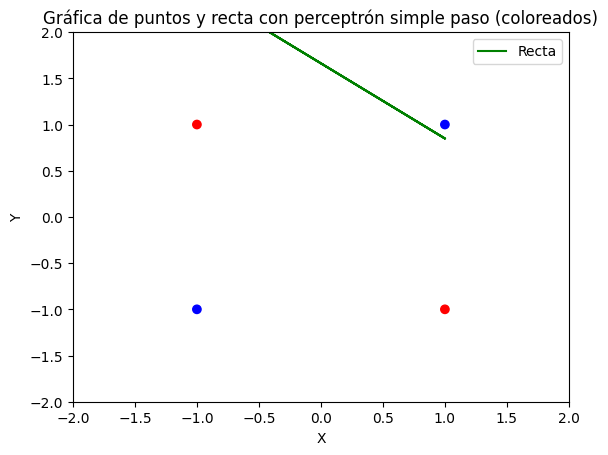

In [168]:
from matplotlib import pyplot as plt
import numpy as np
from src.perceptron_simple_step import perceptron_simple_step

fig, ax = plt.subplots()

eta = 0.01
epoch = 1000
#x1 = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
#y1 = np.array([-1, -1, -1, 1])
x1 = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y1 = np.array([1, 1, -1, -1])
w1 = np.zeros_like(x1)
w1 = perceptron_simple_step(x1, y1, eta, epoch)
y = x1[:,0] * (-(w1[1]/w1[2])) + w1[0]/w1[2]

# Colores y etiquetas según valor de y1
colores = ['red' if y == 1 else 'blue' for y in y1]

# Gráfica de puntos
plt.scatter(x1[:, 0], x1[:, 1], c=colores)

# Gráfica de la recta
plt.plot(x1[:, 0], y, c='green', label='Recta')

# Límites del eje
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
# Etiquetado de ejes
plt.xlabel('X')
plt.ylabel('Y')

# Título del gráfico
plt.title('Gráfica de puntos y recta con perceptrón simple paso (coloreados)')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

En la corrida 0 del la fila 0 con error=2.0 garde los pesos
Guarde estos valores: [0.68114269 0.85105155 0.85459662]
En la corrida 40 del la fila 0 con error=1.0 garde los pesos
Guarde estos valores: [0.26114269 0.99105155 0.71459662]
En la corrida 86 del la fila 1 con error=0.0 garde los pesos
Guarde estos valores: [-0.03885731  0.85105155  0.85459662]


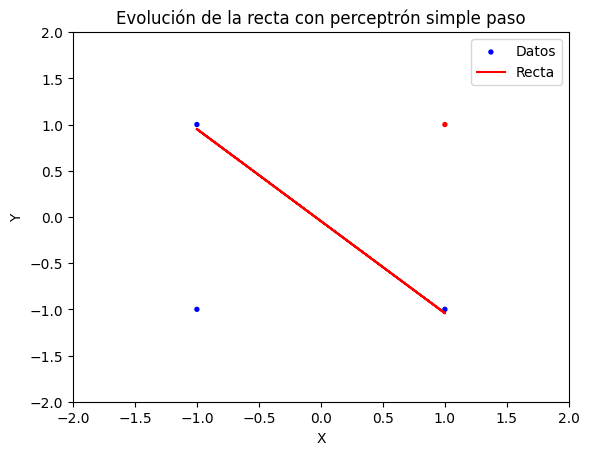

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from src.perceptron_simple_step import perceptron_simple_step

# Importación de librería para pausar la ejecución (opcional)
from time import sleep


def calcular_recta(w1):
    """
    Calcula la ecuación de la recta a partir de los pesos w1.

    Parámetros:
        w1 (numpy.ndarray): Vector de pesos del perceptrón.

    Retorno:
        numpy.ndarray: Ecuación de la recta en forma y = mx + b.
    """
    m = -(w1[1]/w1[2])
    b = w1[0]/w1[2]
    return m, b

def crear_animacion(x1, y1, eta, epoch, num_frames):
    """
    Crea una animación que muestra la evolución de la recta del perceptrón simple paso.
    Parámetros:
        x1 (numpy.ndarray): Matriz de datos de entrada.
        y1 (numpy.ndarray): Vector de etiquetas de los datos.
        eta (float): Tasa de aprendizaje.
        epoch (int): Número de épocas (para la animación).
        num_frames (int): Número de frames de la animación.
    Retorno:
        matplotlib.animation.FuncAnimation: Objeto de animación.
    """

    fig, ax = plt.subplots()

    # Colores según valor de y1
    colores = ['red' if y == 1 else 'blue' for y in y1]
    # Puntos para el scatter
    line_puntos = ax.scatter(x1[:, 0], x1[:, 1], c=colores, marker='o', s=8, label='Datos')

    # Line for the perceptron (initialize with initial weights)
    w1 = perceptron_simple_step(x1, y1, eta, epoch)
    m, b = calcular_recta(w1)  # Calculate initial line equation
    y = m * x1[:, 0] + b  # Calculate y values for initial line equation
    #y = x1 * (-(w1[1]/w1[2])) + w1[0]/w1[2]
    line_recta, = ax.plot(x1[:, 0], y, c='red', label='Recta')
    # Límites del eje
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])

    # Etiquetado de ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Evolución de la recta con perceptrón simple paso')
    ax.legend()


    # Función para actualizar el gráfico en cada frame
    def actualizar(i):
        # Actualización de pesos
        w1 = perceptron_simple_step(x1, y1, eta, epoch)

        # Cálculo de la ecuación de la recta
        m, b = calcular_recta(w1)

        # Cálculo de las nuevas coordenadas de los puntos
        y_nuevos = m * x1[:, 0] + b

        # Creación del nuevo array de offsets
        offsets = np.column_stack((x1[:, 0], y_nuevos))

        # Actualización de la posición de los puntos
        line_puntos.set_offsets(offsets)

        # Update the line data with the new equation
        line_recta.set_data(x1[:, 0], y_nuevos)

        # **Control de finalización de la animación**
        if i == num_frames - 1:
            print("Animación finalizada.")

        # Optional: Print status message every 10 frames
        if i % 10 == 0:
            print(f"Frame {i+1} actualizado.")

    # Creación de la animación
    animacion = FuncAnimation(fig, actualizar, frames=num_frames, interval=10)  # Ajustar el intervalo para la velocidad de la animación

    return animacion

eta = 0.01
epoch = 1000
num_frames = 100
x1 = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y1 = np.array([-1, -1, -1, 1])
w1 = np.zeros_like(x1)

animacion = crear_animacion(x1, y1, eta, epoch, num_frames)
# Mostrar la animación
plt.show()


En la corrida 0 del la fila 15 con error=1552.0593692142859
Guarde estos valores: [0.45092764 0.47032081 0.66028767 0.01734813]
En la corrida 2 del la fila 7 con error=1526.4776549285714
Guarde estos valores: [0.66420153 0.19179434 1.34693007 0.64991035]
En la corrida 5 del la fila 13 con error=1512.3909406428572
Guarde estos valores: [1.64029958 0.25353311 1.57724626 2.3658695 ]


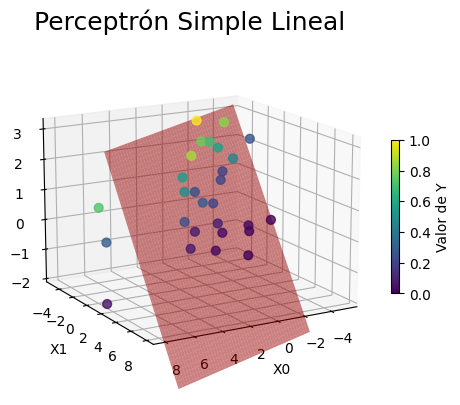

In [7]:
import numpy as np
import pandas as pd
from src.perceptron_simple_lineal import perceptron_simple_lineal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ruta del archivo CSV
archivo_csv = "TP3-ej2-conjunto.csv"
# Leer datos CSV en un DataFrame de pandas
datos_df = pd.read_csv(archivo_csv)
# Convertir DataFrame a un array de NumPy
datos_array = datos_df.to_numpy()
# Extract feature columns (x1, x2, x3) into 'x' array
x = datos_array[:, :-1]  # Assuming 'y' is the last column

# Extract target column (y) into 'y' array
y = datos_array[:, -1]

eta = 0.01
epoch = 100
epsilon = 0.01 
w = perceptron_simple_lineal(x.copy(), y, eta, epsilon, epoch)

# Normalizar valores de 'y' para el colormap
y_norm = (y - y.min()) / (y.max() - y.min())

# Definir colormap y escalar
cmap = plt.cm.viridis
norm = plt.Normalize(0, 1)

# Graficar plano y puntos
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar plano
X, Y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
Z = -(w[0] + w[1] * X + w[2] * Y) / w[3] 
ax.plot_surface(X, Y, Z, color='red', alpha=0.5)

# Graficar puntos
points = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=cmap(y_norm), s=40, alpha=0.8)

# Ajustar etiquetas y título
ax.set_xlabel('X0', fontsize=10)  # Set font size for x-axis label
ax.set_ylabel('X1', fontsize=10)  # Set font size for y-axis label
ax.set_zlabel('X2', fontsize=10)  # Set font size for z-axis label
ax.set_title('Perceptrón Simple Lineal ', fontsize=18)  # Set font size for title

# Ajustar vista
ax.view_init(elev=15, azim=60)
ax.set_zlim(x[:, 2].min(), x[:, 2].max())  # Set z-axis limits based on data range

# Añadir 'points' al eje y crear la barra de color
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(y)
cbar = fig.colorbar(sm, label='Valor de Y', ax=ax, fraction=0.02)  

# Mostrar gráfico
plt.tight_layout()
plt.subplots_adjust(left=0.5)
plt.show()



En la corrida 0 del la fila 17 con error=1512.3909406428572
Guarde estos valores: [0.42506625 0.27563293 0.81500637 0.80352521]
En la corrida 0 del la fila 25 con error=1518.2660835000001
Guarde estos valores: [0.85628551 0.95708877 0.59551349 0.51905727]
En la corrida 3 del la fila 10 con error=1514.2229406428573
Guarde estos valores: [1.77756549 0.26509027 0.45244572 2.82272662]
En la corrida 4 del la fila 12 con error=1512.5330835
Guarde estos valores: [1.83730778 0.73705435 0.51218801 2.70324204]
En la corrida 0 del la fila 27 con error=1529.1027977857143
Guarde estos valores: [0.39050765 0.58678937 0.48936018 0.13244283]
En la corrida 4 del la fila 16 con error=1523.3697977857141
Guarde estos valores: [0.63720297 0.65583409 1.17388408 0.42980577]
En la corrida 5 del la fila 6 con error=1512.3909406428572
Guarde estos valores: [1.22754065 0.65583409 1.41001915 2.0237175 ]
En la corrida 0 del la fila 24 con error=1512.5330835
Guarde estos valores: [1.21901928 0.72982803 0.17055635 0

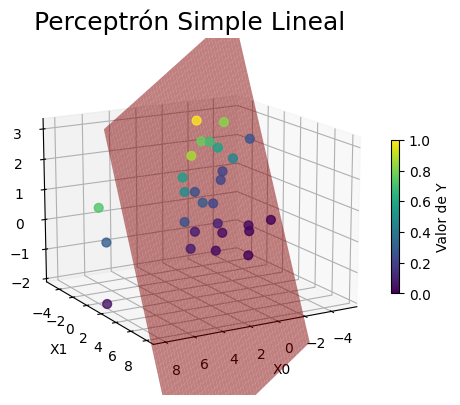

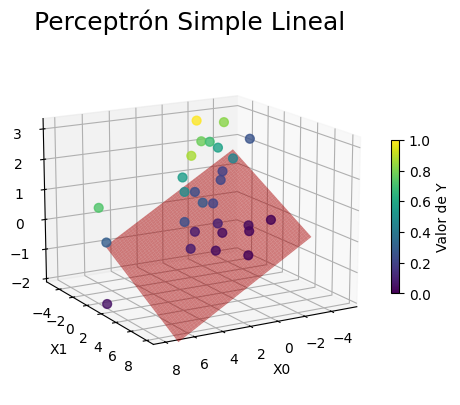

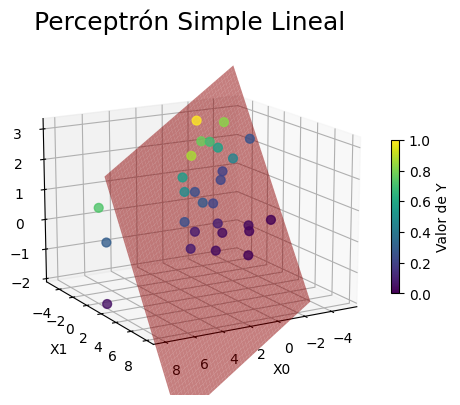

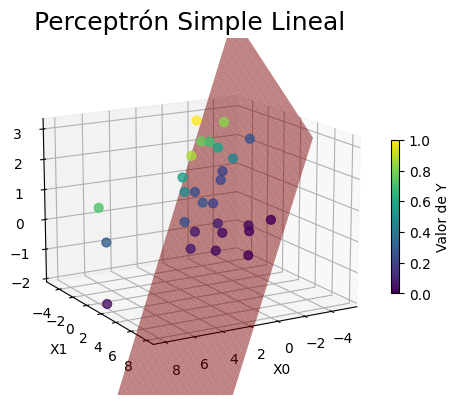

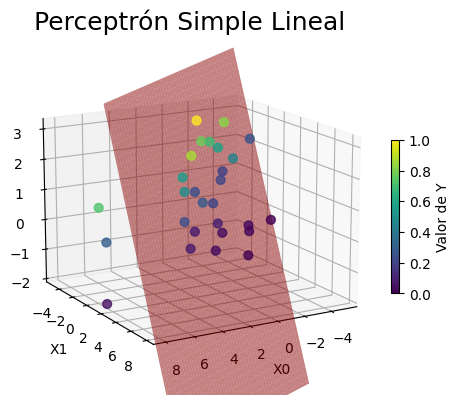

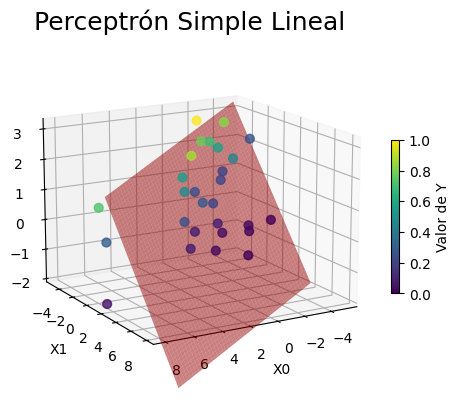

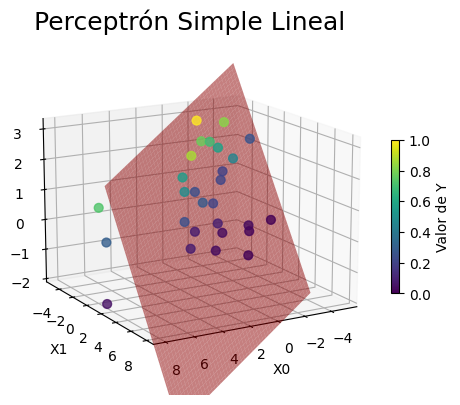

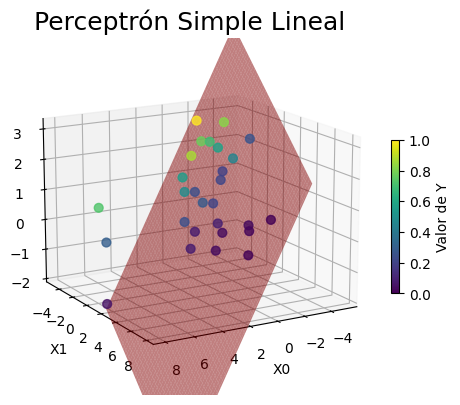

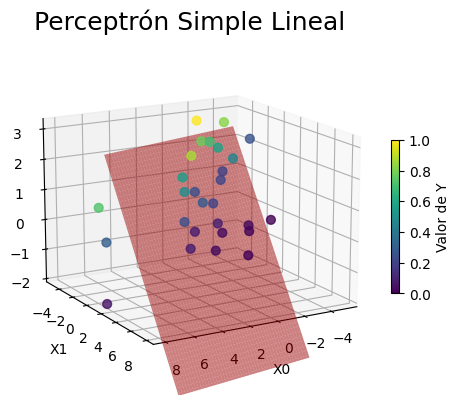

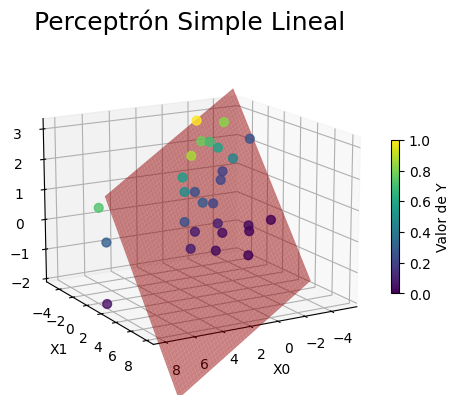

In [8]:
import numpy as np
import pandas as pd
from src.perceptron_simple_lineal import perceptron_simple_lineal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ruta del archivo CSV
archivo_csv = "TP3-ej2-conjunto.csv"
# Leer datos CSV en un DataFrame de pandas
datos_df = pd.read_csv(archivo_csv)
# Convertir DataFrame a un array de NumPy
datos_array = datos_df.to_numpy()
# Extract feature columns (x1, x2, x3) into 'x' array
x = datos_array[:, :-1]  # Assuming 'y' is the last column

# Extract target column (y) into 'y' array
y = datos_array[:, -1]

eta = 0.01
epoch = 100
epsilon = 0.01

# Normalizar valores de 'y' para el colormap
y_norm = (y - y.min()) / (y.max() - y.min())

# Definir colormap y escalar
cmap = plt.cm.viridis
norm = plt.Normalize(0, 1)

for _ in range(10):
    w = perceptron_simple_lineal(x.copy(), y, eta, epsilon, epoch)

    # Graficar plano y puntos
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar plano
    X, Y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    Z = -(w[0] + w[1] * X + w[2] * Y) / w[3] 
    ax.plot_surface(X, Y, Z, color='red', alpha=0.5)

    # Graficar puntos
    points = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=cmap(y_norm), s=40, alpha=0.8)

    # Ajustar etiquetas y título
    ax.set_xlabel('X0', fontsize=10)  # Set font size for x-axis label
    ax.set_ylabel('X1', fontsize=10)  # Set font size for y-axis label
    ax.set_zlabel('X2', fontsize=10)  # Set font size for z-axis label
    ax.set_title('Perceptrón Simple Lineal ', fontsize=18)  # Set font size for title

    # Ajustar vista
    ax.view_init(elev=15, azim=60)
    ax.set_zlim(x[:, 2].min(), x[:, 2].max())  # Set z-axis limits based on data range

    # Añadir 'points' al eje y crear la barra de color
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(y)
    cbar = fig.colorbar(sm, label='Valor de Y', ax=ax, fraction=0.02)  

    # Mostrar gráfico
    plt.tight_layout()
    plt.subplots_adjust(left=0.5)
plt.show()
